<h1 style="text-align: center;">WISE–NEOWISE Asteroid & Comet Analysis</h1>

**By: Elijah Taber**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patheffects as pe
import seaborn as sns
import warnings
import missingno as msno

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

df = pd.read_csv("wise_neowise_segmented.csv")
print(df.shape)
df.head()

(202, 24)


,designation,discovery_date,h_mag,moid_au,q_au,Q_au,period_yr,i_deg,pha,orbit_class,a_au,e,tisserand_jupiter,long_period_flag,log_moid_au,log_q_au,log_Q_au,log_period_yr,log_i_deg,log_a_au,log_tisserand_jupiter,orbit_segment,ecc_segment,tisserand_class
0,419880 (2011 AH37),2011-01-07,19.7,0.035,0.84,4.26,4.06,9.65,Y,Apollo,2.550,0.670588,3.063484,False,0.034401,0.609766,1.660131,1.621366,2.365560,1.266948,1.735083,Near-Jupiter,High-e,Transition
1,419624 (2010 SO16),2010-09-17,20.5,0.028,0.93,1.08,1.00,14.52,Y,Apollo,1.005,0.074627,6.022921,False,0.027615,0.657520,0.732368,0.693147,2.742130,0.695644,2.155109,Inner (NEA),Low-e,Stable
2,414772 (2010 OC103),2010-07-28,19.0,0.333,0.39,2.00,1.31,23.11,N,Apollo,1.195,0.673640,5.003187,False,0.287432,0.329304,1.098612,0.837248,3.182627,0.786182,2.029345,Inner (NEA),High-e,Stable
3,414746 (2010 EH20),2010-03-06,18.0,0.268,1.25,3.99,4.24,23.89,N,Amor,2.620,0.522901,3.091152,False,0.237441,0.810930,1.607436,1.656321,3.214466,1.286474,1.739951,Near-Jupiter,Moderate-e,Transition
4,407324 (2010 OB101),2010-07-18,20.7,0.111,0.77,2.46,2.06,9.12,N,Apollo,1.615,0.523220,4.157657,False,0.105261,0.570980,1.241269,1.118415,2.314514,0.961264,1.911551,Inner (NEA),Moderate-e,Asteroidal


#### Data Card

| Feature | Description |
|--------|-------------|
| **designation** | Official astronomical designation or name of the object (asteroid, comet, or NEO). Format includes year of discovery and alphanumeric code. |
| **discovery_date** | Date when the object was first discovered, formatted as YYYY-MM-DD. |
| **h_mag** | Absolute magnitude (H) of the object in the visible spectrum, measured in magnitudes. Lower values indicate brighter/larger objects; typical range is ~17-24 mag. |
| **moid_au** | Minimum Orbit Intersection Distance with Earth's orbit, measured in astronomical units (AU). Values closer to 0 indicate closer potential approaches to Earth. |
| **q_au** | Perihelion distance (closest approach to the Sun), measured in astronomical units (AU). 1 AU ≈ 150 million km. |
| **Q_au** | Aphelion distance (farthest distance from the Sun), measured in astronomical units (AU). Empty for parabolic/hyperbolic orbits. |
| **period_yr** | Orbital period (time to complete one orbit around the Sun), measured in years. Empty for parabolic/hyperbolic orbits. |
| **i_deg** | Orbital inclination (tilt of orbit relative to Earth's orbital plane), measured in degrees. Range is 0° to 180°. |
| **pha** | Potentially Hazardous Asteroid flag: 'Y' (yes), 'N' (no), or 'Unknown'. Based on size and close approach distance criteria. |
| **orbit_class** | Categorical classification of orbit type (e.g., Apollo, Aten, Amor, Jupiter-family Comet). Describes the object's orbital characteristics and relationship to Earth. |
| **a_au** | Semi-major axis (average distance from the Sun), measured in astronomical units (AU). Defines the size of the elliptical orbit. |
| **e** | Orbital eccentricity, dimensionless value from 0 to 1. 0 = circular orbit, values closer to 1 = more elongated ellipse. Values can exceed 1 for hyperbolic orbits. |
| **tisserand_jupiter** | Tisserand parameter relative to Jupiter, dimensionless. Used to classify objects and distinguish between asteroids (typically >3) and comets (typically <3). |
| **long_period_flag** | Boolean flag indicating if the object has a long orbital period (True/False). Typically True for periods >200 years. |
| **log_moid_au** | Base-10 logarithm of the MOID value. Log-scaled version of moid_au for easier analysis of wide-ranging values. |
| **log_q_au** | Base-10 logarithm of perihelion distance. Log-scaled version of q_au. |
| **log_Q_au** | Base-10 logarithm of aphelion distance. Log-scaled version of Q_au; empty for parabolic/hyperbolic orbits. |
| **log_period_yr** | Base-10 logarithm of orbital period. Log-scaled version of period_yr; empty for parabolic/hyperbolic orbits. |
| **log_i_deg** | Base-10 logarithm of orbital inclination. Log-scaled version of i_deg for statistical analysis. |
| **log_a_au** | Base-10 logarithm of semi-major axis. Log-scaled version of a_au. |
| **log_tisserand_jupiter** | Base-10 logarithm of Tisserand parameter. Log-scaled version; note that negative Tisserand values result in undefined logs. |
| **orbit_segment** | Categorical segmentation based on orbital distance (e.g., Inner NEA, Near-Jupiter, Main Belt, Outer, Extreme). Groups objects by their location in the solar system. |
| **ecc_segment** | Categorical segmentation based on eccentricity (e.g., Low-e, Moderate-e, High-e, Very-high-e). Groups objects by orbit shape: circular to highly elongated. |
| **tisserand_class** | Categorical classification based on Tisserand parameter (e.g., Stable, Asteroidal, Transition, JFC, HTC/Parabolic). Distinguishes dynamical families and comet-like vs asteroid-like orbits. |

<h1 style="text-align: center;">Data Cleaning</h1>

First thing's first, let's rename some columns to give better descriptions into what it is so we don't have to reference each column every time we want to know what it is.

In [2]:
df.rename(columns = {
    'e': 'eccentricity', 
    'h_mag': 'abs_mag',
    'q_au': 'perihelion_au',
    'Q_au': 'aphelion_au',
    'i_deg': 'inclination_deg',
    'a_au': 'semi_major_axis_au'
}, inplace = True)

Now let's drop the log columns as they are currently not needed for analysis. If we need them later, it is a quick calculation.

In [3]:
df = df.drop(columns=[col for col in df.columns if col.startswith('log_')])

In [4]:
# Rearrange columns with date first, then logical groupings as I personally always prefer the date to be first
column_order = [
    'discovery_date',
    'designation',
    'orbit_class',
    'orbit_segment',
    'tisserand_class',
    'ecc_segment',
    'pha',
    'long_period_flag',
    'semi_major_axis_au',
    'eccentricity',
    'perihelion_au',
    'aphelion_au',
    'period_yr',
    'inclination_deg',
    'moid_au',
    'tisserand_jupiter',
    'abs_mag'
]

df = df[column_order].reset_index(drop=True) # avoid creating an extra column from the old index

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   discovery_date      202 non-null    object 
 1   designation         202 non-null    object 
 2   orbit_class         202 non-null    object 
 3   orbit_segment       200 non-null    object 
 4   tisserand_class     192 non-null    object 
 5   ecc_segment         200 non-null    object 
 6   pha                 202 non-null    object 
 7   long_period_flag    202 non-null    bool   
 8   semi_major_axis_au  200 non-null    float64
 9   eccentricity        200 non-null    float64
 10  perihelion_au       202 non-null    float64
 11  aphelion_au         200 non-null    float64
 12  period_yr           200 non-null    float64
 13  inclination_deg     202 non-null    float64
 14  moid_au             202 non-null    float64
 15  tisserand_jupiter   200 non-null    float64
 16  abs_mag 

In [6]:
df.memory_usage(deep=True).to_frame('Memory (bytes)').sort_values('Memory (bytes)')

,Memory (bytes)
Index,132
long_period_flag,202
period_yr,1616
inclination_deg,1616
perihelion_au,1616
eccentricity,1616
semi_major_axis_au,1616
aphelion_au,1616
moid_au,1616
tisserand_jupiter,1616


#### Data Type Coercion

Check data types to ensure they are not only correct, but optimized. It is not necessarily needed for a small dataset such as this, but it still good practice for larger and more complicated datasets. For example, turning a column from a Y/N object datatype (around 50 bytes) into a boolean of True/False (1 single byte) is a 50x increase in memory efficiency for each value! That adds up very quickly in large datasets.

In [7]:
df['discovery_date'] = pd.to_datetime(df['discovery_date'])
df['pha'] = df['pha'].map({'Y': True, 'N': False, 'Unknown': pd.NA}).astype('boolean')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   discovery_date      202 non-null    datetime64[ns]
 1   designation         202 non-null    object        
 2   orbit_class         202 non-null    object        
 3   orbit_segment       200 non-null    object        
 4   tisserand_class     192 non-null    object        
 5   ecc_segment         200 non-null    object        
 6   pha                 181 non-null    boolean       
 7   long_period_flag    202 non-null    bool          
 8   semi_major_axis_au  200 non-null    float64       
 9   eccentricity        200 non-null    float64       
 10  perihelion_au       202 non-null    float64       
 11  aphelion_au         200 non-null    float64       
 12  period_yr           200 non-null    float64       
 13  inclination_deg     202 non-null    float64       

In [8]:
df.memory_usage(deep=True).to_frame('Memory (bytes)').sort_values('Memory (bytes)')

,Memory (bytes)
Index,132
long_period_flag,202
pha,404
discovery_date,1616
perihelion_au,1616
eccentricity,1616
semi_major_axis_au,1616
aphelion_au,1616
inclination_deg,1616
period_yr,1616


## Manipulating Missing Data

<Axes: >

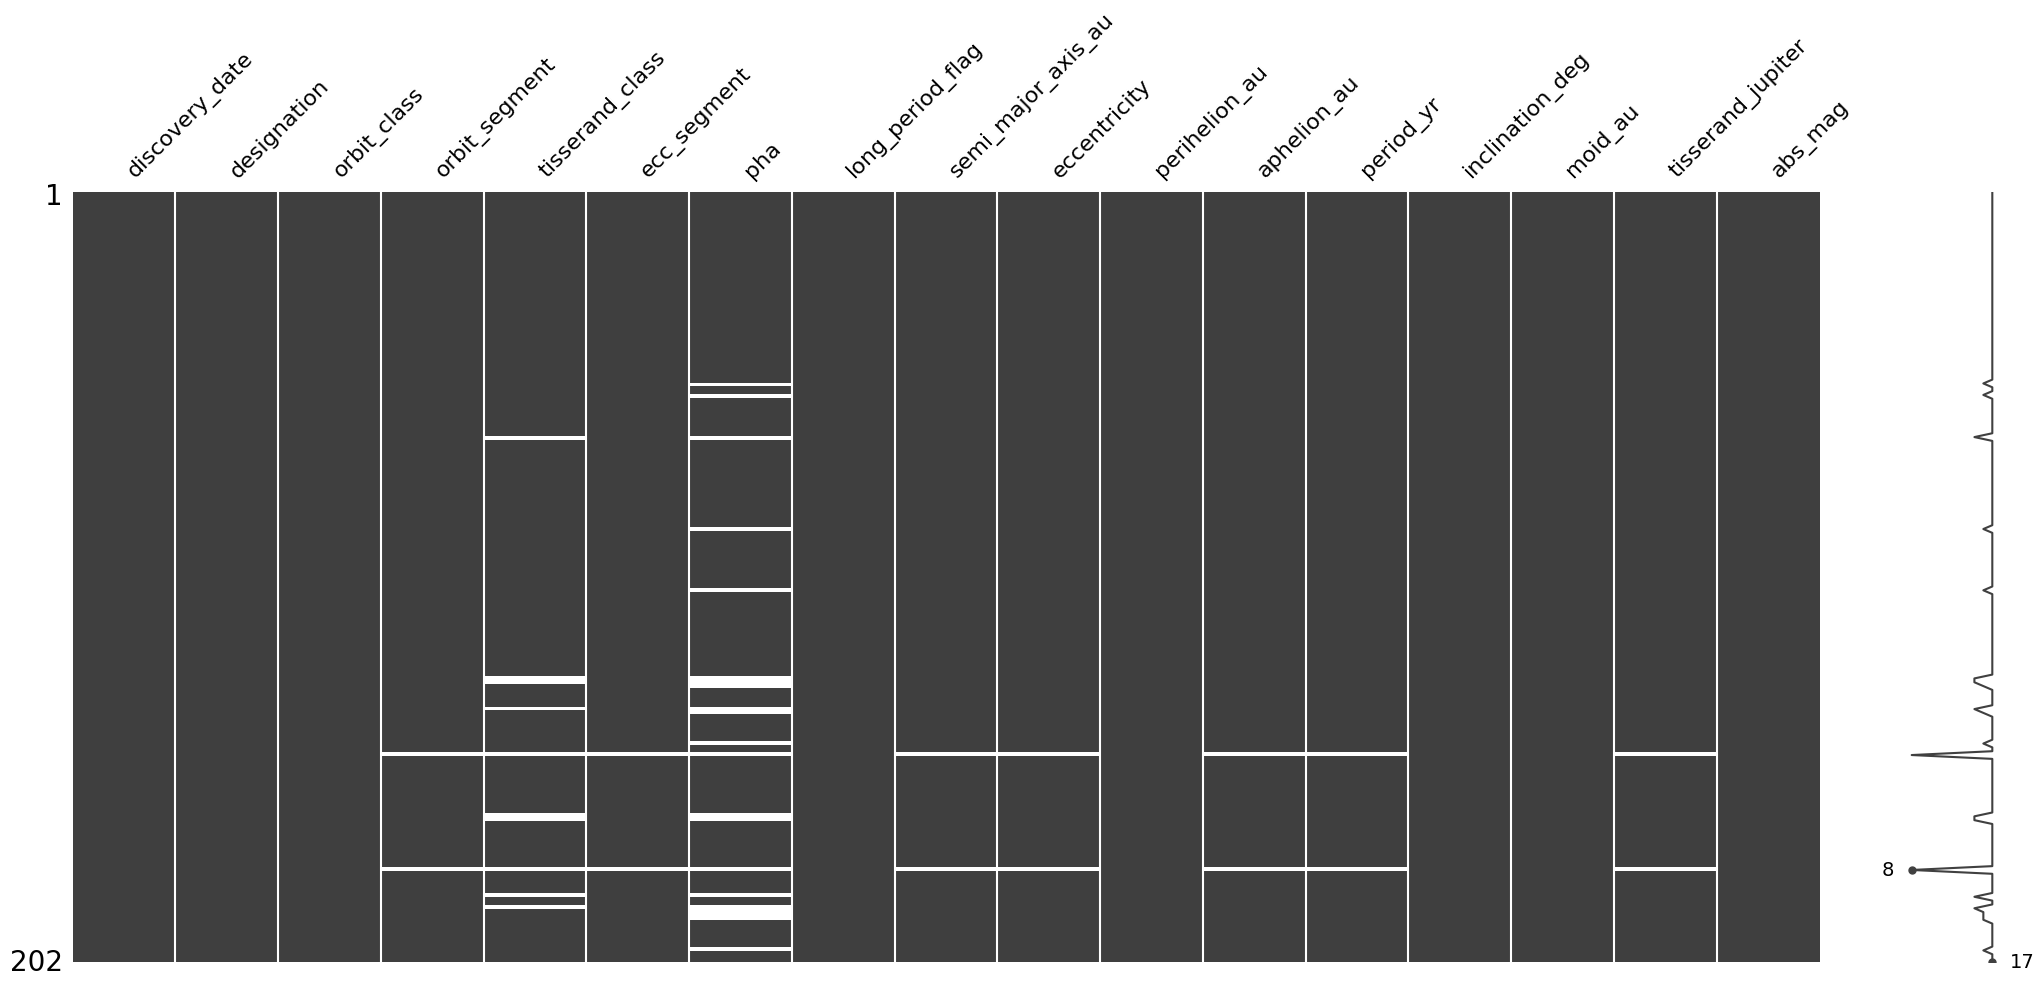

In [9]:
msno.matrix(df)

In [10]:
df.isna().sum()

discovery_date         0
designation            0
orbit_class            0
orbit_segment          2
tisserand_class       10
ecc_segment            2
pha                   21
long_period_flag       0
semi_major_axis_au     2
eccentricity           2
perihelion_au          0
aphelion_au            2
period_yr              2
inclination_deg        0
moid_au                0
tisserand_jupiter      2
abs_mag                0
dtype: int64

## Imputation

This step requires looking at each feature one by one and determining the best method for properly filling its missing values. Since this dataset is based on real physical laws and objects, we can use this to our advantage to calculate null spaces based logical physical deductions and using other non-null features to help calculate these gaps.

#### Step 1: Deterministic Orbital Calculations

**Semi-Major Axis**

The semi-major axis is the average of the closest (perihelion) and farthest (aphelion) distances from the Sun.

$$a = \frac{q + Q}{2}$$

In [11]:
df['semi_major_axis_au'] = df['semi_major_axis_au'].fillna(
    (df['perihelion_au'] + df['aphelion_au']) / 2
)

**Aphelion**

Rearranging the semi-major axis formula to solve for aphelion distance.

$$Q = 2a - q$$

In [12]:
df['aphelion_au'] = df['aphelion_au'].fillna(
    2 * df['semi_major_axis_au'] - df['perihelion_au']
)

**Eccentricity**

Eccentricity measures how elliptical an orbit is, derived from the difference between aphelion and perihelion.

$$e = \frac{Q - q}{Q + q}$$

In [13]:
df['eccentricity'] = df['eccentricity'].fillna(
    (df['aphelion_au'] - df['perihelion_au']) / (df['aphelion_au'] + df['perihelion_au'])
)

**Orbital Period**

Kepler's Third Law relates orbital period to semi-major axis (with period in years and distance in AU).

$$P = a^{3/2}$$

In [14]:
df['period_yr'] = df['period_yr'].fillna(
    df['semi_major_axis_au'] ** 1.5
)

**Step 2: Group-Based Imputation for Remaining Nulls**

For rows missing multiple orbital parameters simultaneously, we impute using the median value from asteroids in the same orbit_class (e.g., Apollo, Amor), since asteroids in the same class share similar orbital characteristics.

In [15]:
numerical_cols = ['semi_major_axis_au', 'eccentricity', 'aphelion_au', 
                  'period_yr', 'tisserand_jupiter']

# Impute using median within the same orbit_class
for col in numerical_cols:
    df[col] = df.groupby('orbit_class')[col].transform(
        lambda x: x.fillna(x.median())
    )

# Fallback: if still null (in case entire group is null), use overall median
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

**Step 3: Tisserand Parameter**

The Tisserand parameter measures an asteroid's orbital relationship to Jupiter and is used for classification. Now that orbital parameters are complete, we can calculate any remaining missing values.

$$T_J = \frac{a_J}{a} + 2\cos(i)\sqrt{\frac{a}{a_J}(1-e^2)}$$

where $a_J \approx 5.2$ AU is Jupiter's semi-major axis.

In [16]:
a_jupiter = 5.2
mask = df['tisserand_jupiter'].isna()
df.loc[mask, 'tisserand_jupiter'] = (
    a_jupiter / df.loc[mask, 'semi_major_axis_au'] + 2 * np.cos(np.radians(df.loc[mask, 'inclination_deg'])) * np.sqrt((df.loc[mask, 'semi_major_axis_au'] / a_jupiter) * (1 - df.loc[mask, 'eccentricity']**2))
)

**Step 4: Categorical Variables (Mode by Group)**

For categorical features, we impute using the most frequent value (mode) within each orbit_class.

In [17]:
df['orbit_segment'] = df.groupby('orbit_class')['orbit_segment'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown')
)

df['tisserand_class'] = df.groupby('orbit_class')['tisserand_class'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown')
)

**Step 5: Eccentricity Segment**

This categorical feature is a binned (split into 1 of 3 categories) version of eccentricity, so we derive it directly from the numerical value.

$$\text{ecc\_segment} = \begin{cases} \text{Low-e} & e < 0.2 \\ \text{Moderate-e} & 0.2 \leq e < 0.5 \\ \text{High-e} & e \geq 0.5 \end{cases}$$

In [18]:
def get_ecc_segment(ecc):
    if ecc < 0.2:
        return 'Low-e'
    elif ecc < 0.5:
        return 'Moderate-e'
    else:
        return 'High-e'

mask = df['ecc_segment'].isna()
df.loc[mask, 'ecc_segment'] = df.loc[mask, 'eccentricity'].apply(get_ecc_segment)

**Step 6: Potentially Hazardous Asteroid (PHA)**

An asteroid is classified as potentially hazardous if its orbit comes within 0.05 AU of Earth's orbit (MOID) and it's large enough to cause significant damage (absolute magnitude < 22, roughly 140m diameter).

$$\text{PHA} = (\text{MOID} < 0.05) \land (H < 22)$$

In [19]:
mask = df['pha'].isna()
df.loc[mask, 'pha'] = (df.loc[mask, 'moid_au'] < 0.05) & (df.loc[mask, 'abs_mag'] < 22)

Verify all null values are filled.

In [20]:
df.isna().sum()

discovery_date        0
designation           0
orbit_class           0
orbit_segment         0
tisserand_class       0
ecc_segment           0
pha                   0
long_period_flag      0
semi_major_axis_au    0
eccentricity          0
perihelion_au         0
aphelion_au           0
period_yr             0
inclination_deg       0
moid_au               0
tisserand_jupiter     0
abs_mag               0
dtype: int64

## Duplicate Detection

By duplicates, I am referring to rows where ALL columns are the exact same value.

In [21]:
def duplicates(df):
    # Local scope the dataframe to check for duplicates without affecting the original df
    before = df.shape[0]
    df = df.drop_duplicates()
    after = df.shape[0]

    total_duplicates = before - after
    print(f"There are a total of {total_duplicates} duplicates in this dataset.")
    
duplicates(df)

There are a total of 0 duplicates in this dataset.


#### Sort by Date

In [22]:
df = df.sort_values('discovery_date').reset_index(drop=True)
df.head()

,discovery_date,designation,orbit_class,orbit_segment,tisserand_class,ecc_segment,pha,long_period_flag,semi_major_axis_au,eccentricity,perihelion_au,aphelion_au,period_yr,inclination_deg,moid_au,tisserand_jupiter,abs_mag
0,2010-01-12,(2010 AB78),Amor,Near-Jupiter,Transition,Moderate-e,False,False,2.255,0.547672,1.02,3.49,3.38,33.26,0.206,3.227439,18.3
1,2010-01-13,(2010 AU118),Amor,Inner (NEA),Asteroidal,Moderate-e,False,False,1.625,0.304615,1.13,2.12,2.06,43.73,0.147,3.969502,17.7
2,2010-01-13,(2010 AG79),Amor,Near-Jupiter,JFC,Moderate-e,False,False,2.905,0.580034,1.22,4.59,4.95,32.96,0.244,2.811732,19.9
3,2010-01-22,P/2010 B2 (WISE),Encke-type Comet,Near-Jupiter,Transition,Moderate-e,False,False,3.110,0.479100,1.62,4.60,5.49,8.93,0.630,3.013209,20.3
4,2010-02-01,(2010 CO1),Apollo,Inner (NEA),Stable,Low-e,True,False,1.010,0.217822,0.79,1.23,1.02,24.03,0.023,5.934225,21.5


<h1 style="text-align: center;">EDA</h1>

In [23]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

#### Separate Features by Type

In [24]:
categorical_cols = ['orbit_class', 'orbit_segment', 'tisserand_class', 'ecc_segment']
boolean_cols = ['pha', 'long_period_flag']
numerical_cols = ['semi_major_axis_au', 'eccentricity', 'perihelion_au', 'aphelion_au', 
                  'period_yr', 'inclination_deg', 'moid_au', 'tisserand_jupiter', 'abs_mag']
temporal_cols = ['discovery_date']

print(f"Dataset Shape: {df.shape[0]} objects × {df.shape[1]} features\n")
print(f"Categorical Features ({len(categorical_cols)}): {categorical_cols}")
print(f"Boolean Features ({len(boolean_cols)}): {boolean_cols}")
print(f"Numerical Features ({len(numerical_cols)}): {numerical_cols}")
print(f"Temporal Features ({len(temporal_cols)}): {temporal_cols}")

Dataset Shape: 202 objects × 17 features

Categorical Features (4): ['orbit_class', 'orbit_segment', 'tisserand_class', 'ecc_segment']
Boolean Features (2): ['pha', 'long_period_flag']
Numerical Features (9): ['semi_major_axis_au', 'eccentricity', 'perihelion_au', 'aphelion_au', 'period_yr', 'inclination_deg', 'moid_au', 'tisserand_jupiter', 'abs_mag']
Temporal Features (1): ['discovery_date']


In [25]:
numerical_summary = df[numerical_cols].describe().T
numerical_summary['skewness'] = df[numerical_cols].skew()
numerical_summary['kurtosis'] = df[numerical_cols].kurtosis()
numerical_summary['iqr'] = numerical_summary['75%'] - numerical_summary['25%']
numerical_summary['cv'] = (numerical_summary['std'] / numerical_summary['mean'] * 100).round(2)

display(numerical_summary.style.format("{:.3f}").background_gradient(cmap='Blues', subset=['skewness', 'kurtosis']))

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis,iqr,cv
semi_major_axis_au,202.000,117.055,1015.189,0.800,1.516,2.192,2.678,11629.680,9.961,102.757,1.161,867.280
eccentricity,202.000,0.543,0.203,0.075,0.415,0.557,0.655,1.000,0.010,-0.147,0.241,37.420
perihelion_au,202.000,1.064,0.744,0.140,0.772,0.970,1.110,7.150,4.535,27.922,0.338,69.910
aphelion_au,202.000,233.054,2030.026,1.040,2.105,3.470,4.545,23255.110,9.962,102.768,2.440,871.060
period_yr,202.000,10617.591,102807.563,0.720,1.870,3.250,4.375,1254179.620,10.737,120.092,2.505,968.280
inclination_deg,202.000,29.383,27.308,0.820,14.082,22.945,34.203,162.300,2.936,9.980,20.120,92.940
moid_au,202.000,0.331,0.723,0.000,0.054,0.149,0.269,6.373,5.197,32.434,0.214,218.840
tisserand_jupiter,202.000,3.556,1.489,-1.606,2.912,3.328,4.334,7.247,-0.575,2.207,1.421,41.880
abs_mag,202.000,20.309,1.440,15.600,19.500,20.300,21.200,24.300,-0.092,0.664,1.700,7.090


**Interpretation**

This dataset reveals a clear split in feature distributions: three orbital distance/time features (semi_major_axis_au, aphelion_au, period_yr) exhibit extreme positive skewness (9.9–10.7) and kurtosis (102–120), indicating the presence of a few long-period comets with extreme values (e.g., one object has a 1.25 million year orbital period) that dramatically inflate the means far beyond the medians—these will require log transformation before modeling. Two additional features (moid_au, perihelion_au) show moderate right skew (4.5–5.2) and may benefit from transformation as well. On the other hand, eccentricity, abs_mag, and tisserand_jupiter are approximately normally distributed (skewness near zero) and can be used as-is; notably, tisserand_jupiter is the only left-skewed feature with a negative minimum (-1.606), which is physically meaningful as values below 2 typically indicate cometary rather than asteroidal origin. The coefficient of variation (CV) reinforces this pattern, ranging from just 7% for the tightly clustered abs_mag to nearly 1000% for period_yr, confirming that outlier handling and feature transformation should be prioritized before any downstream analysis or modeling.

## Orbit Class Distribution

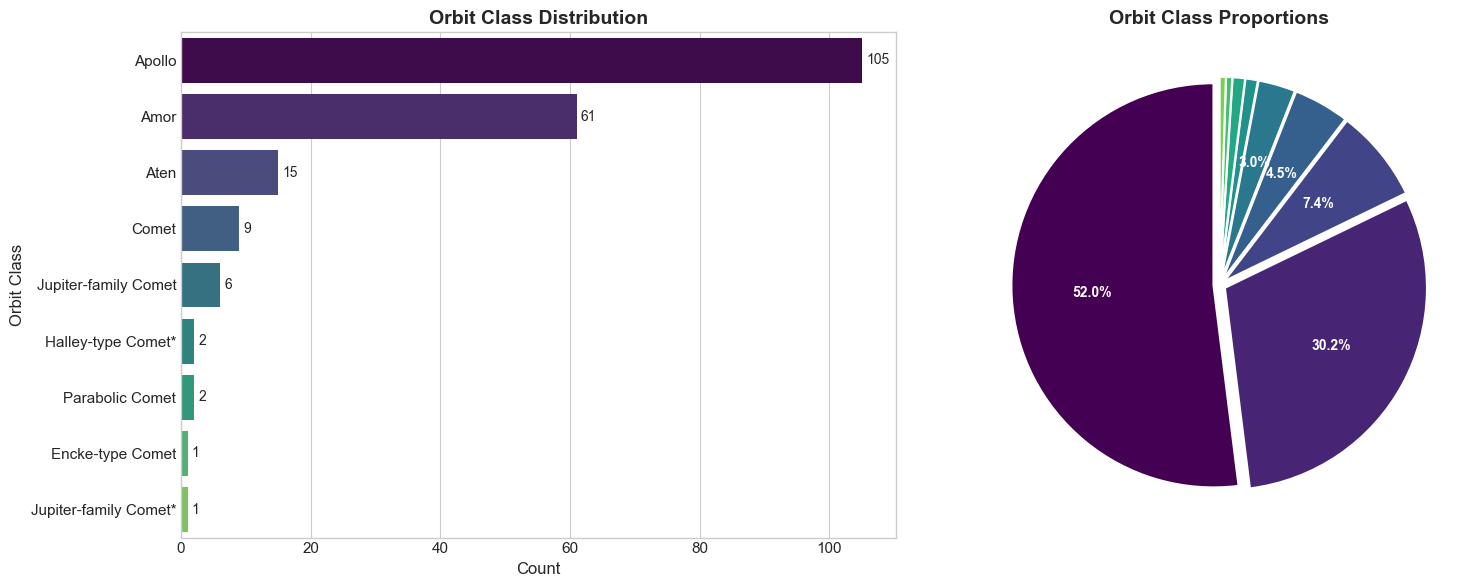


Orbit Class Value Counts:
                       Count
orbit_class                 
Apollo                   105
Amor                      61
Aten                      15
Comet                      9
Jupiter-family Comet       6
Halley-type Comet*         2
Parabolic Comet            2
Encke-type Comet           1
Jupiter-family Comet*      1


In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

order = df['orbit_class'].value_counts().index
bar_colors = plt.cm.viridis(np.linspace(0, 0.8, len(order)))
sns.countplot(data=df, y='orbit_class', order=order, ax=axes[0], palette=bar_colors)
axes[0].set_title('Orbit Class Distribution', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Count', fontsize=12)
axes[0].set_ylabel('Orbit Class', fontsize=12)

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', padding=3, fontsize=10)

counts = df['orbit_class'].value_counts()
colors = [bar_colors[list(order).index(label)] for label in counts.index]

def autopct_format(pct):
    return f'{pct:.1f}%' if pct > 2 else ''

axes[1].pie(counts, labels=None, autopct=autopct_format, colors=colors, 
            startangle=90, explode=[0.03] * len(counts), 
            textprops={'fontsize': 10, 'weight': 'bold', 'color': 'white'},
            wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})
axes[1].set_title('Orbit Class Proportions', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()

print("\nOrbit Class Value Counts:")
print(df['orbit_class'].value_counts().to_frame().rename(columns={'count': 'Count'}))

## Orbit Segment Distribution

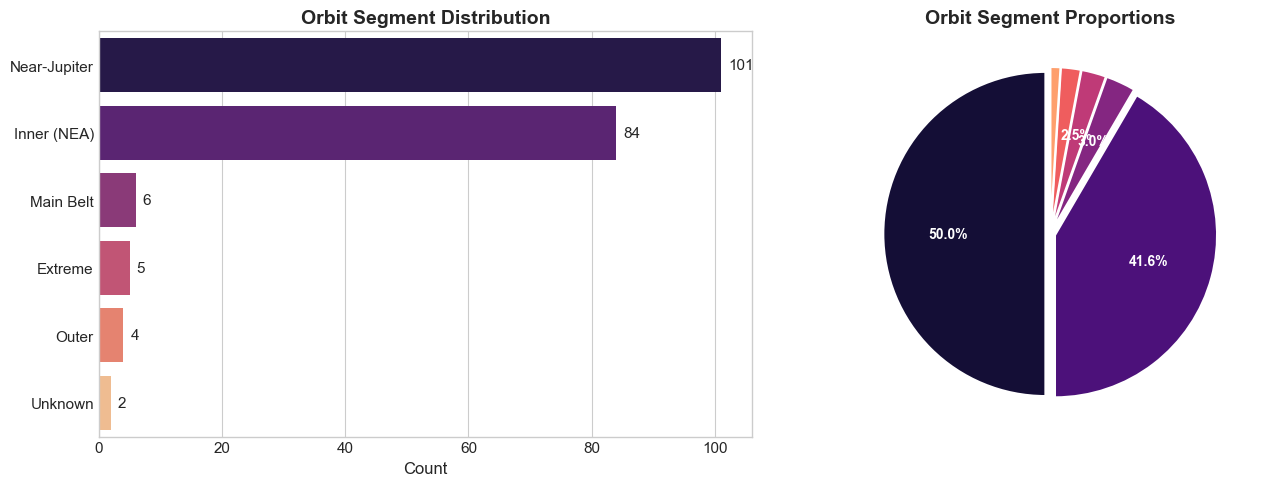


Orbit Segment Value Counts:
               Count
orbit_segment       
Near-Jupiter     101
Inner (NEA)       84
Main Belt          6
Extreme            5
Outer              4
Unknown            2


In [27]:
# Cell 15 - Python
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

order = df['orbit_segment'].value_counts().index
sns.countplot(data=df, y='orbit_segment', order=order, ax=axes[0], palette='magma')
axes[0].set_title('Orbit Segment Distribution', fontweight='bold')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', padding=5)

colors = plt.cm.magma(np.linspace(0.1, 0.8, len(df['orbit_segment'].unique())))
counts = df['orbit_segment'].value_counts()

axes[1].pie(counts, labels=None, autopct=autopct_format, colors=colors, 
            startangle=90, explode=[0.03] * len(counts), 
            textprops={'fontsize': 10, 'weight': 'bold', 'color': 'white'},
            wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})
axes[1].set_title('Orbit Segment Proportions', fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print("\nOrbit Segment Value Counts:")
print(df['orbit_segment'].value_counts().to_frame().rename(columns={'count': 'Count'}))

## Numerical Features by Orbit Class

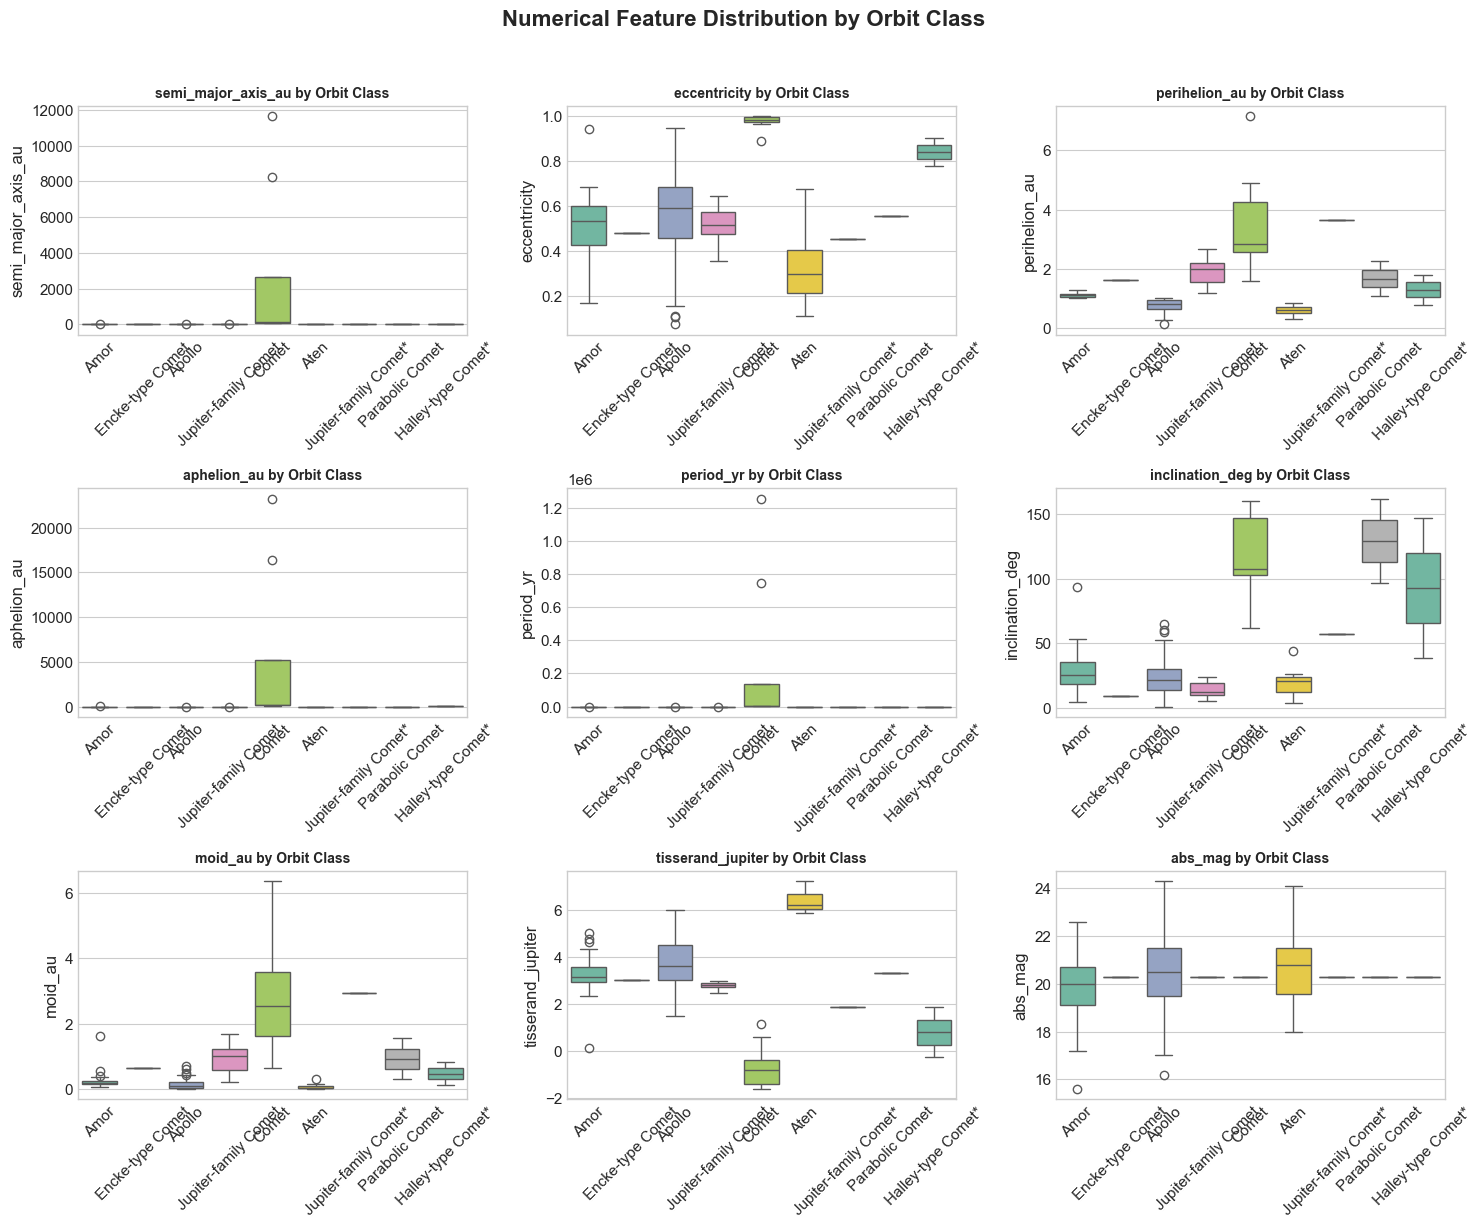

In [28]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    sns.boxplot(data=df, x='orbit_class', y=col, ax=ax, palette='Set2')
    ax.set_title(f'{col} by Orbit Class', fontweight='bold', fontsize=10)
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Numerical Feature Distribution by Orbit Class', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## MOID vs Absolute Magnitude (Hazard Assessment)

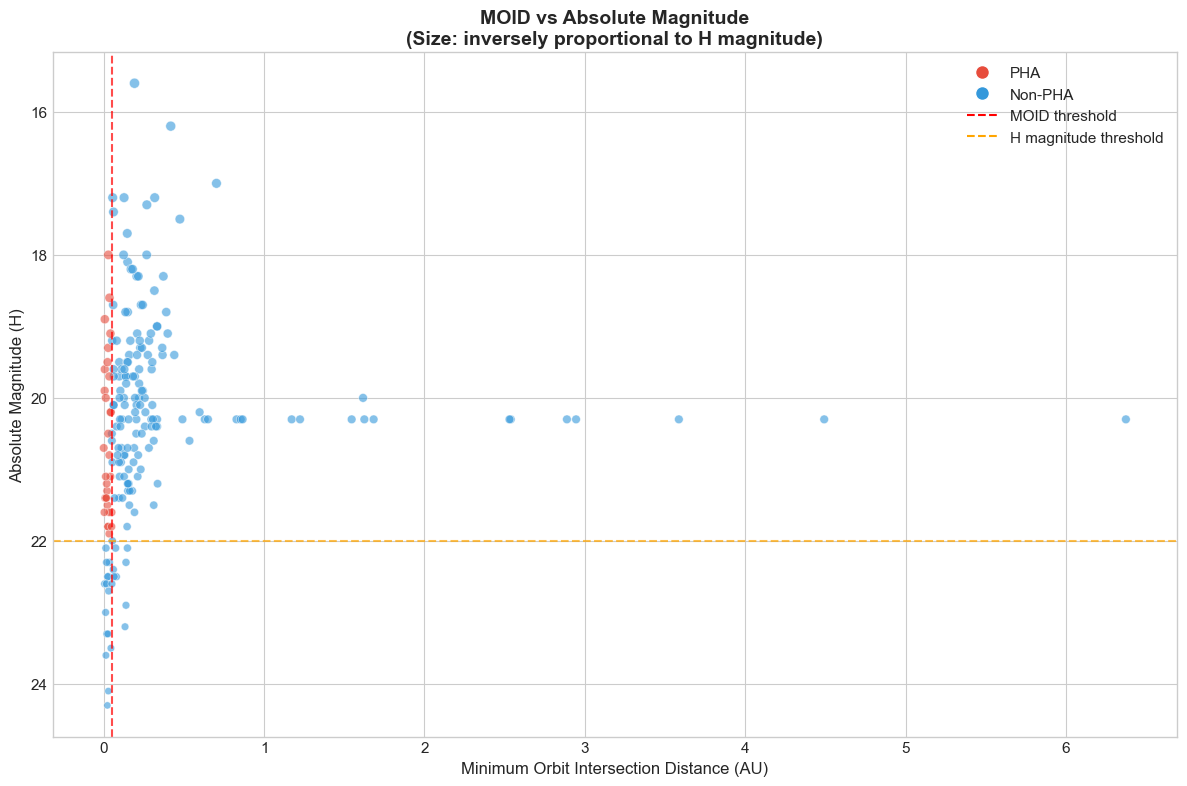

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = df['pha'].map({True: '#e74c3c', False: '#3498db'})
sizes = 100 - df['abs_mag'] * 3

scatter = ax.scatter(df['moid_au'], df['abs_mag'], c=colors, s=sizes.clip(20, 200), 
                     alpha=0.6, edgecolors='white', linewidth=0.5)

ax.set_xlabel('Minimum Orbit Intersection Distance (AU)', fontsize=12)
ax.set_ylabel('Absolute Magnitude (H)', fontsize=12)
ax.set_title('MOID vs Absolute Magnitude\n(Size: inversely proportional to H magnitude)', fontsize=14, fontweight='bold')
ax.axvline(x=0.05, color='red', linestyle='--', alpha=0.7, label='MOID < 0.05 AU (PHA threshold)')
ax.axhline(y=22.0, color='orange', linestyle='--', alpha=0.7, label='H < 22 (Diameter > ~140m)')


legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='#e74c3c', markersize=10, label='PHA'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='#3498db', markersize=10, label='Non-PHA'),
                   Line2D([0], [0], color='red', linestyle='--', label='MOID threshold'),
                   Line2D([0], [0], color='orange', linestyle='--', label='H magnitude threshold')]
ax.legend(handles=legend_elements, loc='upper right')

ax.invert_yaxis()
plt.tight_layout()
plt.show()

## The Big Picture

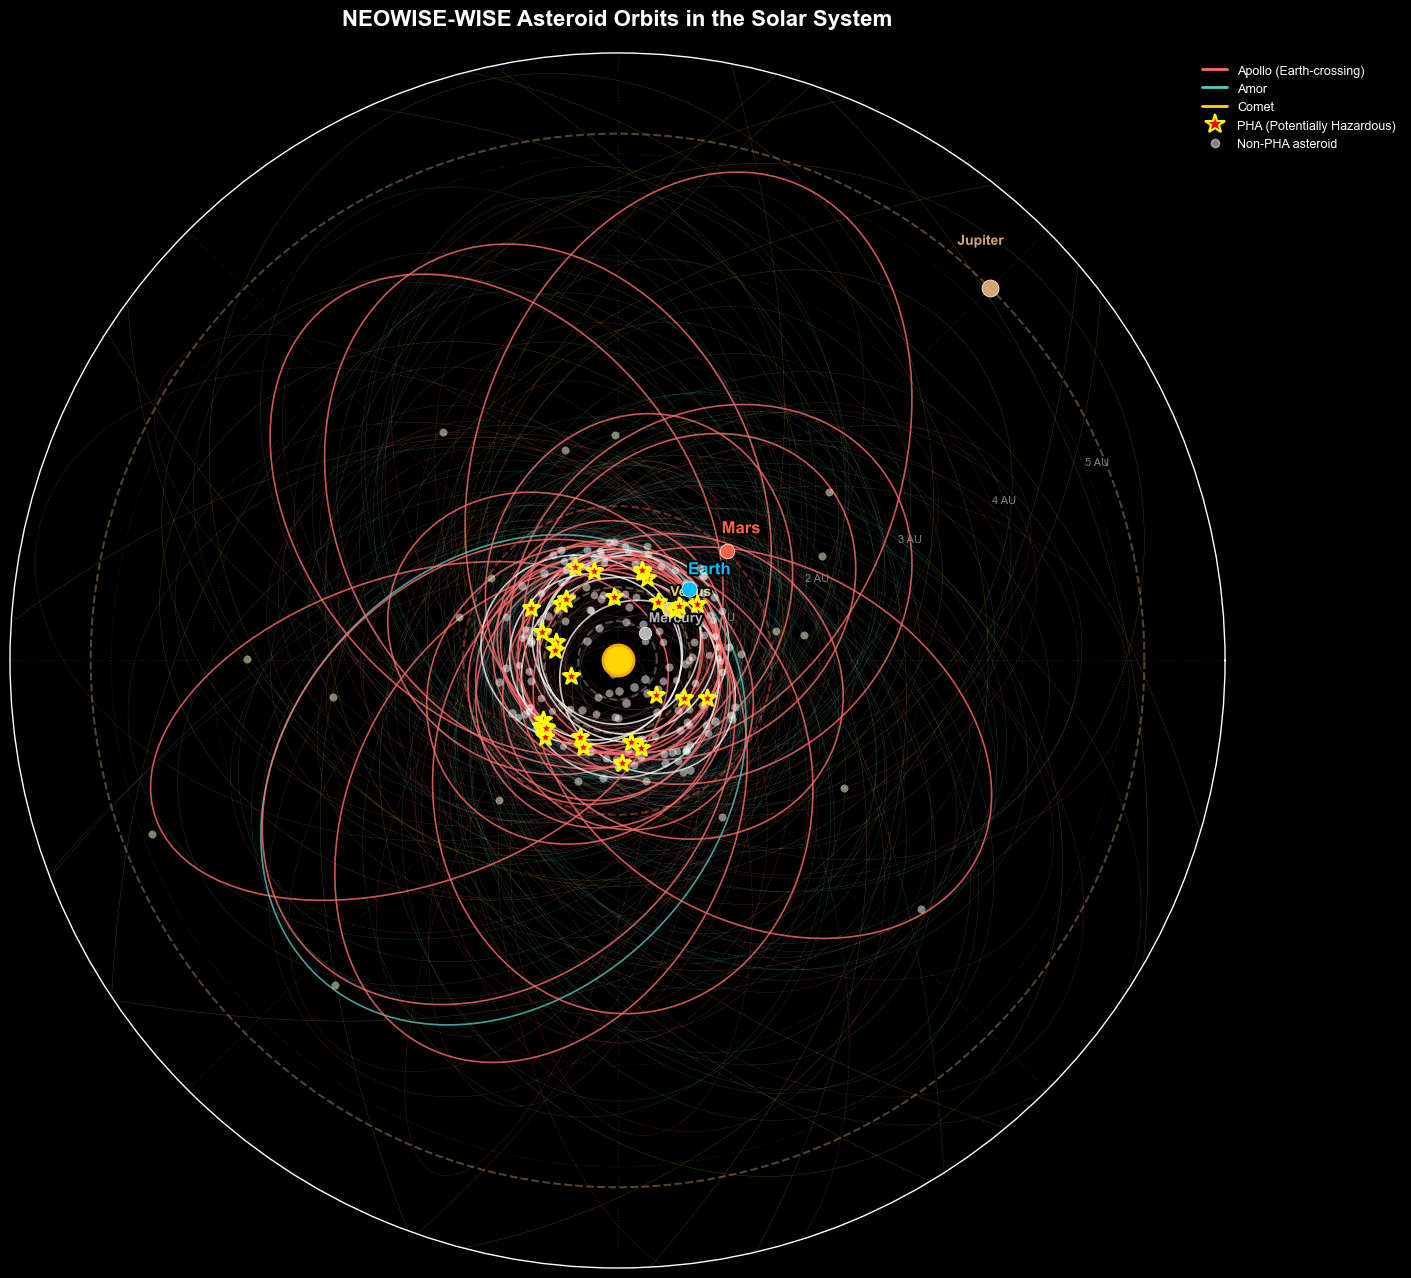

In [ ]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 14), subplot_kw={'projection': 'polar'})
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Planet properties: semi-major axis (avg distance from Sun), color, marker size, font size
planets = {
    'Mercury': {'a': 0.387, 'color': '#B5B5B5', 'size': 80, 'fontsize': 10},
    'Venus': {'a': 0.723, 'color': '#E6C87A', 'size': 100, 'fontsize': 10},
    'Earth': {'a': 1.000, 'color': '#00BFFF', 'size': 120, 'fontsize': 12},
    'Mars': {'a': 1.524, 'color': '#FF6347', 'size': 110, 'fontsize': 12},
    'Jupiter': {'a': 5.203, 'color': '#D4A574', 'size': 150, 'fontsize': 10}
}

# Create 500 evenly spaced angle points from 0 to 2π (full circle) for smooth orbit circles
theta_orbit = np.linspace(0, 2 * np.pi, 500)

# Draw each planet's orbit as a circular path
for planet_name, planet_data in planets.items():
    r_orbit = np.full_like(theta_orbit, planet_data['a']) # create constant radius array matching theta length (circular orbit)
    
    # Orbit circle
    ax.plot(theta_orbit, 
            r_orbit, 
            color=planet_data['color'], 
            linewidth=1.5, 
            alpha=0.4, 
            linestyle='--')
    
    # Position planet marker on its orbit
    planet_angle = np.pi / 4  # 45 degrees (π/4 radians)
    
    # Plot planets
    ax.scatter(planet_angle, 
               planet_data['a'], 
               s=planet_data['size'], 
               color=planet_data['color'], 
               edgecolors='white', 
               linewidths=0.5, 
               zorder=10)
    
    # Add planet name label slightly offset from marker for readability
    ax.annotate(planet_name, 
                xy=(planet_angle, planet_data['a']),
                xytext=(planet_angle + 0.1, planet_data['a'] + 0.1),
                color=planet_data['color'],
                fontsize=planet_data['fontsize'], 
                fontweight='bold',
                path_effects=[pe.withStroke(linewidth=3, foreground='black')])

# The Sun
ax.scatter(0, 0, 
           s=500, 
           color='#FFD700',
           marker='o', 
           edgecolors='#FFA500', 
           linewidths=2, 
           zorder=15, 
           label='Sun')

# Plot asteroid orbits using perihelion and aphelion
for idx, row in df.iterrows():
    a = row['semi_major_axis_au']
    e = row['eccentricity']
    is_pha = row['pha']
    
    # Calculate elliptical orbit path using polar equation: r = a(1-e²)/(1 + e*cos(θ))
    theta = np.linspace(0, 2 * np.pi, 300) # 300 evenly-spaced angle points around a full circle (0 to 2π radians)
    r = a * (1 - e**2) / (1 + e * np.cos(theta))
    
    # Add random rotation angle to avoid all orbits aligned
    rotation = np.random.uniform(0, 2 * np.pi)
    theta_rotated = theta + rotation
    
    # Assign color based on orbit classification for easy identification
    if row['orbit_class'] == 'Apollo':
        orbit_color = '#FF6B6B'
    elif row['orbit_class'] == 'Amor':
        orbit_color = '#4ECDC4'
    elif 'Comet' in row['orbit_class']:
        orbit_color = '#FFD700'
    else:
        orbit_color = '#FFFFFF'
    
    # Make PHAs more prominent with thicker, more opaque lines
    if is_pha:
        line_width = 1.2
        line_alpha = 0.8
    else:
        line_width = 0.3
        line_alpha = 0.3
    
    # Draw the orbital path with calculated parameters
    ax.plot(theta_rotated, r, color=orbit_color, linewidth=line_width, alpha=line_alpha)
    
    # Mark perihelion (closest point to Sun) on the orbit, then add π to rotation to place marker on opposite side (perihelion definition)
    perihelion_theta = rotation + np.pi
    perihelion_r = row['perihelion_au']
    
    # PHAs get prominent star markers with high visibility
    if is_pha:
        ax.scatter(perihelion_theta, 
                   perihelion_r, s=150, 
                   color='#FF0000', 
                   edgecolors='yellow', 
                   linewidths=2,
                   alpha=1.0, 
                   zorder=12, 
                   marker='*')
    else:
        # Brighter (lower H) = larger marker, clamped between 10-40 pixels
        size = max(10, 40 - (row['abs_mag'] - 15) * 2)
        ax.scatter(perihelion_theta, 
                   perihelion_r, 
                   s=size, 
                   color='white', 
                   edgecolors=orbit_color, 
                   linewidths=0.3,
                   alpha=0.5, 
                   zorder=5)

ax.set_ylim(0, 6)  # show distances from 0 to 6 AU (just past Jupiter)
ax.set_rticks([1, 2, 3, 4, 5]) # set radial tick marks at 1 AU intervals
ax.set_yticklabels(['1 AU', '2 AU', '3 AU', '4 AU', '5 AU'], color='gray', fontsize=8) # label radial ticks with AU units,
ax.set_xticklabels([])  # remove angle labels
ax.grid(True, alpha=0.2, color='gray', linestyle=':') # add subtle grid lines for distance reference

plt.title('NEOWISE-WISE Asteroid Orbits in the Solar System', color='white', fontsize=16, fontweight='bold', pad=20)

legend_elements = [
    Line2D([0], [0], color='#FF6B6B', linewidth=2, label='Apollo (Earth-crossing)'),
    Line2D([0], [0], color='#4ECDC4', linewidth=2, label='Amor'),
    Line2D([0], [0], color='#FFD700', linewidth=2, label='Comet'),
    Line2D([0], [0], marker='*', color='#FF0000', markersize=15, linestyle='None', label='PHA (Potentially Hazardous)', markeredgecolor='yellow', markeredgewidth=1.5),
    Line2D([0], [0], marker='o', color='white', markersize=6, linestyle='None', label='Non-PHA asteroid', alpha=0.5)
]

# Position legend outside plot area (upper right) with black background
ax.legend(handles=legend_elements, 
          loc='upper right', 
          bbox_to_anchor=(1.15, 1.0), 
          facecolor='black', 
          edgecolor='gray', 
          fontsize=9)

plt.tight_layout()
plt.show()

As we can see there are a lot of solid lines representing the orbital trajectory that overlap with Earth's position. Now timing is also a big factor here, as both Earth and the asteroid are constantly moving and they have to be in the same place at the same time for them to collide with each other.